In [1]:
import pandas as pd
# Load data from the Excel sheet
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtl/PlasticFADE.xlsx"  # CHECK: confirm file path
sheet_name = "Rate constants"

# Read and display the data
data_D = pd.read_excel(file_path, sheet_name=sheet_name, usecols='F:J', skiprows=2)
data_D_1 = data_D.iloc[0:21, :]
pd.set_option('display.float_format', '{:.2e}'.format)
print(data_D_1)

   Polymer.1 Compartment.1  kdegr [d-1]  kdegr_LL[d-1]  kdegr_UL[d-1]
0         PP           Air     5.03e-04       2.13e-04       3.07e-03
1         PP          TopS     7.61e-04       1.44e-04       6.91e-03
2         PP          SubS     3.48e-04       6.83e-05       2.54e-03
3         PP         Beach     7.16e-04       3.29e-04       4.29e-03
4         PP          WSur     5.26e-04       2.39e-04       3.21e-03
5         PP          WCol     9.89e-06       4.02e-06       3.18e-05
6         PP          Sedm     3.02e-05       9.61e-06       1.19e-04
7         PS           Air     8.82e-05       4.67e-05       2.11e-04
8         PS          TopS     8.91e-04       1.05e-04       1.42e-02
9         PS          SubS     3.81e-04       5.23e-05       4.54e-03
10        PS         Beach     2.34e-04       1.07e-04       1.19e-03
11        PS          WSur     1.06e-04       6.10e-05       2.59e-04
12        PS          WCol     7.01e-06       2.34e-06       2.99e-05
13        PS        

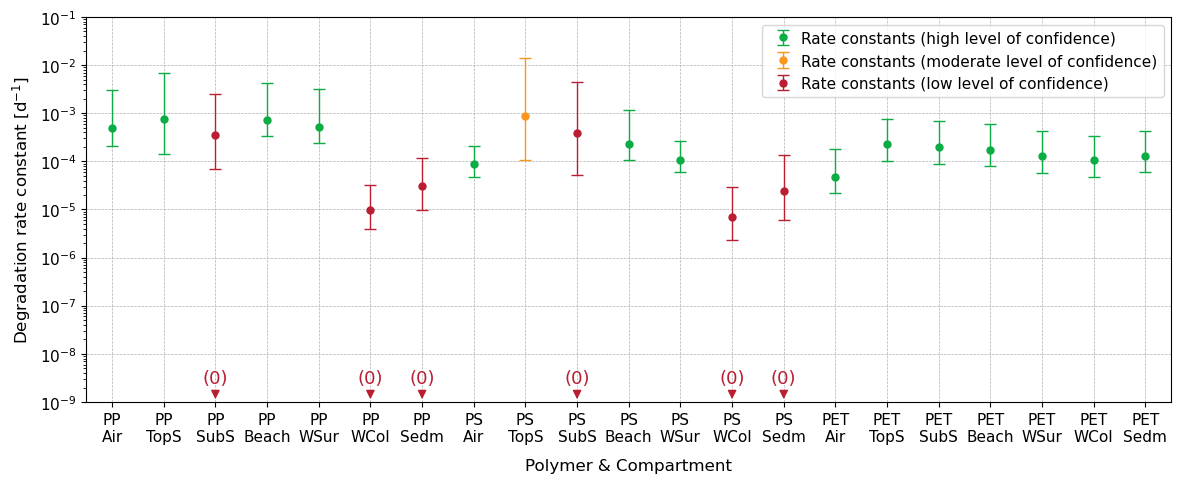

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 5))

data_D_1 = data_D_1.copy()
x = range(len(data_D_1))
data_D_1['x_labels'] = data_D_1['Polymer.1'] + '\n' + data_D_1['Compartment.1']

y = data_D_1['kdegr [d-1]']
yerr_lower = y - data_D_1['kdegr_LL[d-1]']
yerr_upper = data_D_1['kdegr_UL[d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Specify indices for each color-coding category (0-based)
idx_low = [2, 5, 6, 9, 12, 13]
idx_moderate = [8]
idx_high = [i for i in range(len(data_D_1)) if i not in idx_low + idx_moderate]

# Plot main results with asymmetric error bars
def plot_points(indices, color, label):
    first = True
    for i in indices:
        yi  = y.iloc[i]
        yerr_i = [[yerr_lower.iloc[i]], [yerr_upper.iloc[i]]]
        plt.errorbar(
            [i], [yi], yerr=yerr_i,
            fmt='o',
            color=color,  # marker color
            ecolor=color,  # error bar color (use 'black' here if you prefer black whiskers)
            markersize=5,
            elinewidth=1,
            capsize=4,
            label=label if first else None
        )
        first = False

plot_points(idx_high, '#0BAC43', 'Rate constants (high level of confidence)')
plot_points(idx_moderate, '#FA961E', 'Rate constants (moderate level of confidence)')
plot_points(idx_low, '#B91E32', 'Rate constants (low level of confidence)')

# Indices (0-based) to ALWAYS show the bottom "0" arrow for
force_zero_idx = [2, 5, 6, 9, 12, 13]

def annotate_bottom_zero(i, color='#B91E32'):
    y_zero_marker = min_display_y * 1
    y_zero_label  = y_zero_marker * 2
    plt.annotate(
        '(0)',
        xy=(i, y_zero_marker),
        xytext=(i, y_zero_label),
        textcoords='data',
        ha='center',
        va='bottom',
        fontsize=13,
        color=color,
        arrowprops=dict(arrowstyle='-|>', color=color, lw=1),
        clip_on=False,
    )

# Show the outliers (outside the plot boundary)
y_max = 1e-1
label_y = y_max * 10**0.25  # X% above the plot top
min_display_y = 1e-9

for i in range(len(data_D_1)):
    upper = data_D_1['kdegr_UL[d-1]'].iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}".replace("+", "")

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

# Annotate 0 and arrows if i is in the forced list
for i in range(len(data_D_1)):
    if i in force_zero_idx:
        annotate_bottom_zero(i)

# Configure x-axis
plt.xticks(x, data_D_1['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10, fontsize=12)
plt.ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.legend(loc='upper right', handletextpad=0.2, fontsize=11)
plt.xlim(-0.5, len(data_D_1) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-9, 1e-1)  # Set the y-axis range (change manually)
plt.gca().yaxis.set_major_locator(FixedLocator([10**exp for exp in range(-9, 0, 1)]))  # Manually set the tick positions at every 1e1
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/DEGR_top.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.show()

In [7]:
data_D_2 = data_D.iloc[21:42, :]
print(data_D_2)

   Polymer.1 Compartment.1  kdegr [d-1]  kdegr_LL[d-1]  kdegr_UL[d-1]
21      HDPE           Air     4.79e-05       3.14e-05       1.85e-04
22      HDPE          TopS     3.27e-04       9.81e-05       1.96e-03
23      HDPE          SubS     2.18e-04       6.73e-05       1.11e-03
24      HDPE         Beach     1.81e-04       9.19e-05       6.57e-04
25      HDPE          WSur     1.02e-04       6.40e-05       2.99e-04
26      HDPE          WCol     3.81e-05       1.99e-05       9.91e-05
27      HDPE          Sedm     6.59e-05       2.88e-05       2.01e-04
28      LDPE           Air     1.16e-04       1.14e-04       1.18e-04
29      LDPE          TopS     9.52e-04       2.17e-04       1.82e-02
30      LDPE          SubS     4.82e-04       7.14e-05       7.44e-03
31      LDPE         Beach     3.46e-04       1.59e-04       2.58e-03
32      LDPE          WSur     1.80e-04       1.33e-04       5.18e-04
33      LDPE          WCol     3.54e-05       1.24e-05       1.77e-04
34      LDPE        

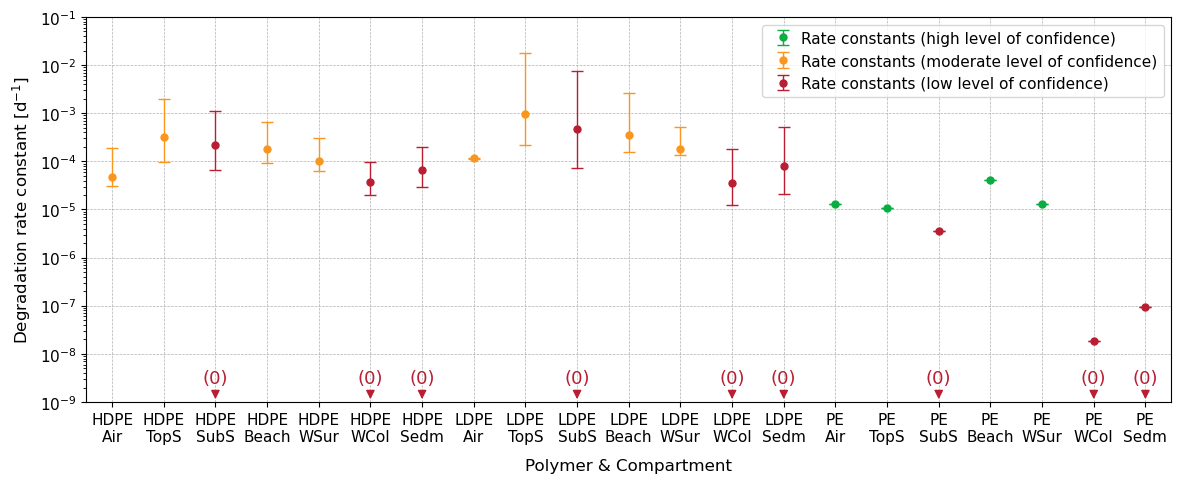

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 5))

data_D_2 = data_D_2.copy()
x = range(len(data_D_2))
data_D_2['x_labels'] = data_D_2['Polymer.1'] + '\n' + data_D_2['Compartment.1']

y = data_D_2['kdegr [d-1]']
yerr_lower = y - data_D_2['kdegr_LL[d-1]']
yerr_upper = data_D_2['kdegr_UL[d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Specify indices for each color-coding category (0-based)
idx_high = [14, 15, 17, 18]
idx_low = [2, 5, 6, 9, 12, 13, 16, 19, 20]
idx_moderate = [i for i in range(len(data_D_2)) if i not in idx_high + idx_low]

# Plot main results with asymmetric error bars
def plot_points(indices, color, label):
    first = True
    for i in indices:
        yi  = y.iloc[i]
        yerr_i = [[yerr_lower.iloc[i]], [yerr_upper.iloc[i]]]
        plt.errorbar(
            [i], [yi], yerr=yerr_i,
            fmt='o',
            color=color,  # marker color
            ecolor=color,  # error bar color (use 'black' here if you prefer black whiskers)
            markersize=5,
            elinewidth=1,
            capsize=4,
            label=label if first else None
        )
        first = False

plot_points(idx_high, '#0BAC43', 'Rate constants (high level of confidence)')
plot_points(idx_moderate, '#FA961E', 'Rate constants (moderate level of confidence)')
plot_points(idx_low, '#B91E32', 'Rate constants (low level of confidence)')

# Indices (0-based) to ALWAYS show the bottom "0" arrow for
force_zero_idx = [2, 5, 6, 9, 12, 13, 16, 19, 20]

def annotate_bottom_zero(i, color='#B91E32'):
    y_zero_marker = min_display_y * 1
    y_zero_label  = y_zero_marker * 2
    plt.annotate(
        '(0)',
        xy=(i, y_zero_marker),
        xytext=(i, y_zero_label),
        textcoords='data',
        ha='center',
        va='bottom',
        fontsize=13,
        color=color,
        arrowprops=dict(arrowstyle='-|>', color=color, lw=1),
        clip_on=False,
    )

# Show the outliers (outside the plot boundary)
y_max = 1e-1
label_y = y_max * 10**0.25  # X% above the plot top

for i in range(len(data_D_2)):
    upper = data_D_2['kdegr_UL[d-1]'].iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}".replace("+", "")

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

# Annotate 0 and arrows if i is in the forced list
for i in range(len(data_D_2)):
    if i in force_zero_idx:
        annotate_bottom_zero(i)

# Configure x-axis
plt.xticks(x, data_D_2['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10, fontsize=12)
plt.ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.legend(loc='upper right', handletextpad=0.2, fontsize=11)
plt.xlim(-0.5, len(data_D_2) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-9, 1e-1)  # Set the y-axis range (change manually)
plt.gca().yaxis.set_major_locator(FixedLocator([10**exp for exp in range(-9, 0, 1)]))  # Manually set the tick positions at every 1e1
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/DEGR_bottom.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.show()